In [2]:
import numpy
print(numpy.__version__)

1.22.4


In [3]:
from tssb.utils import load_time_series_segmentation_datasets
from tssb.evaluation import covering
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_tssb_dataset
import matplotlib.pyplot as plt
from tssb.utils import visualize_time_series
import pandas as pd
import numpy as np
import csv


In [4]:
tssb = load_time_series_segmentation_datasets(names=["CricketX.txt"])
clasp = BinaryClaSPSegmentation()
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    
    plt.figure(figsize=(20, 6))
    plt.plot(ts)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f"Time Series Plot: {ts_name}")
    plt.grid(True)
    plt.show()
    
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 

From Just looking at the data when its plotted, I cannot tell when the data changes from one state to the next. With this dataset, claspy is getting a covering score of .486. This is not a very goo score as the range of covering scores is [0, 1]

Time Series: InlineSkate: True Change Points: [1058 2704], Found Change Points: [899, 2442, 3179], Score: 0.7888581867993273


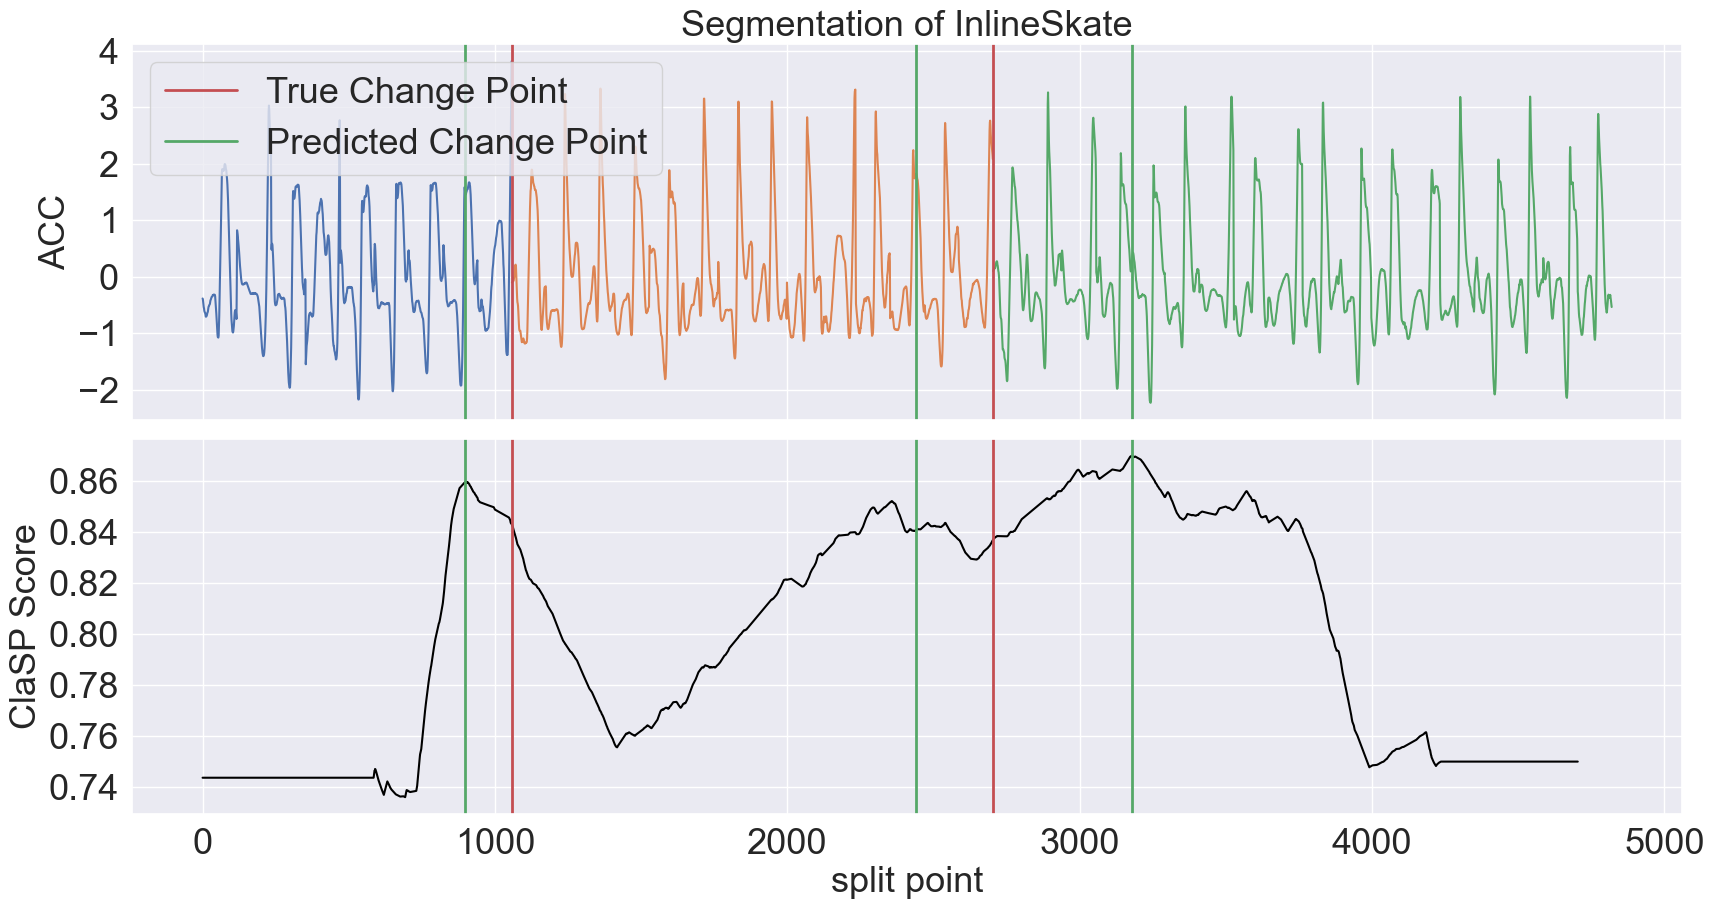

In [5]:
tssb = load_time_series_segmentation_datasets(names=["InlineSkate"])
clasp = BinaryClaSPSegmentation(window_size="acf")
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])    
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 

Time Series: InlineSkate: True Change Points: [1058 2704], Found Change Points: [946, 2201], Score: 0.7730241045390377


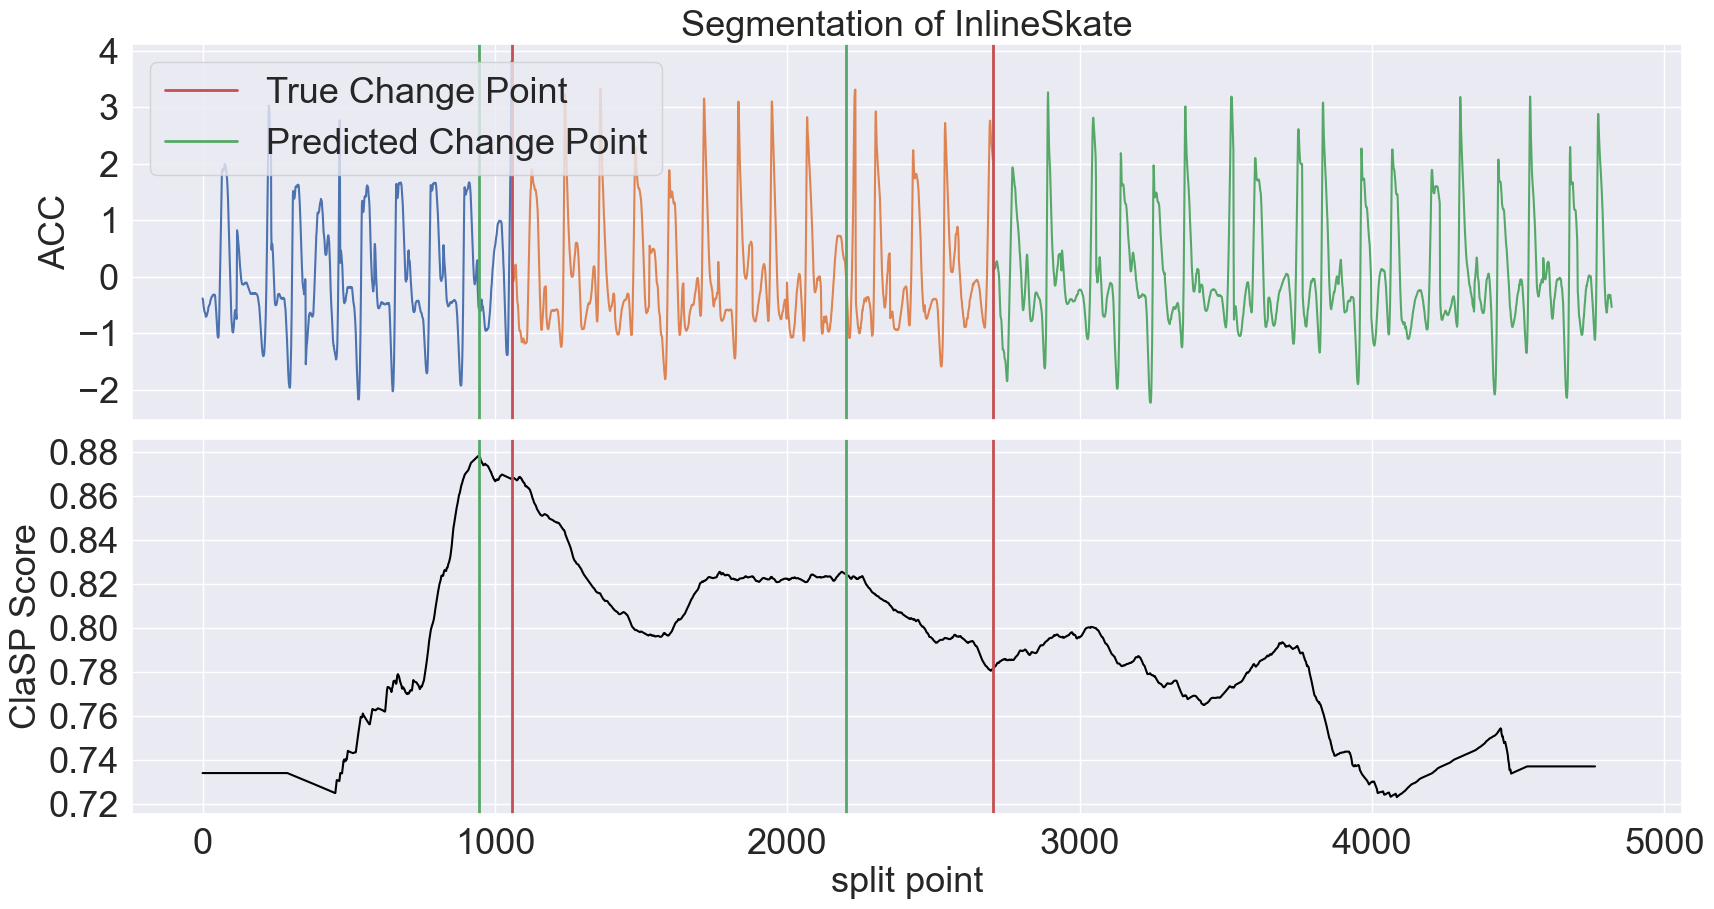

In [6]:
tssb = load_time_series_segmentation_datasets(names=["InlineSkate"])
clasp = BinaryClaSPSegmentation(window_size="fft")
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 

The code above me tests the different window size that claspy comes with, by changing these parameters, we can get a more accurate score depending on the dataset

In [7]:
np.random.seed(1379)
dataset = "Noise"
cps = np.array([400, 1600, 1000])
time_series = np.concatenate((
    np.random.rand(cps[0]),
    1 + np.random.rand(cps[1]),
    -1 + np.random.rand(cps[2])
))
cps = np.cumsum(cps)[:-1]

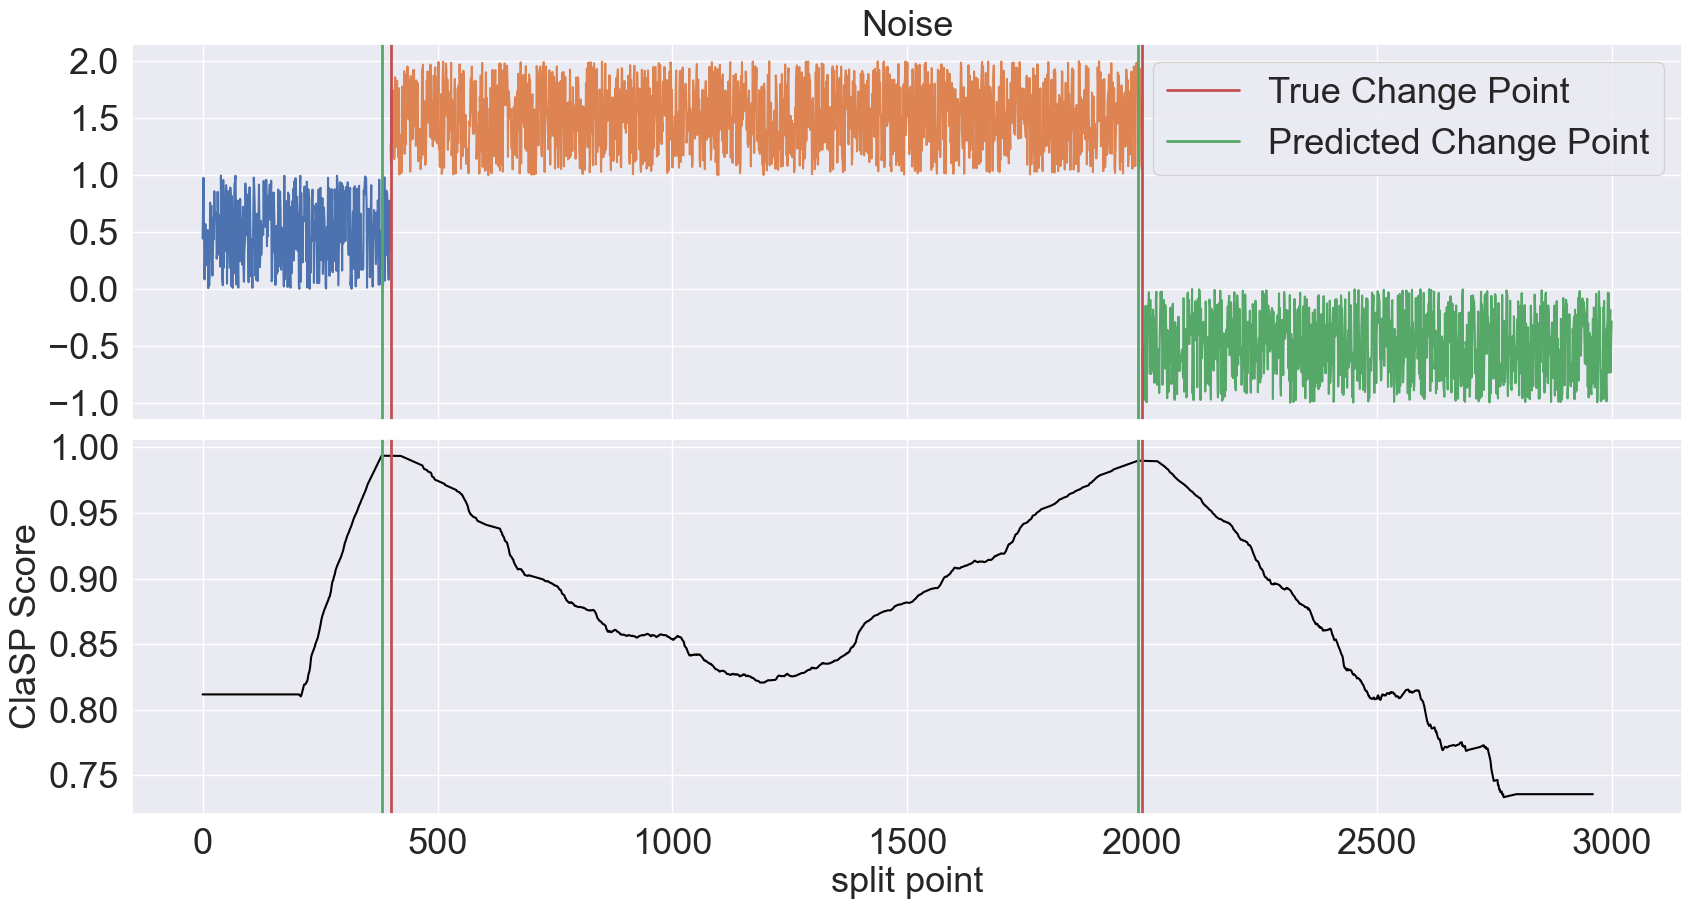

Time Series: InlineSkate: True Change Points: [ 400 2000], Found Change Points: [946, 2201], Score: 0.7730241045390377


In [9]:
clasp = BinaryClaSPSegmentation(distance="euclidean_distance").fit(time_series)
clasp.plot(heading=dataset, gt_cps=cps)
plt.show()
print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
